# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://openweathermap.org/api"
#response = requests.get(url).json()
#print(response)
#print(json.dumps(response, indent=6,sort_keys=True))

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = "https://2u-data-curriculum-team.s3.amazonaws.com/dataviz-classroom/v1.1/06-Python-APIs/request_review.json"
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()



        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds =city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | belle fourche
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | prieska
Processing Record 10 of Set 1 | geraldton
Processing Record 11 of Set 1 | te anau
Processing Record 12 of Set 1 | mayo
Processing Record 13 of Set 1 | tasbuget
City not found. Skipping...
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | pangnirtung
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | olafsvik
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 

Processing Record 38 of Set 4 | mitsamiouli
Processing Record 39 of Set 4 | kavaratti
Processing Record 40 of Set 4 | mwinilunga
Processing Record 41 of Set 4 | flin flon
Processing Record 42 of Set 4 | kotel
Processing Record 43 of Set 4 | pangody
Processing Record 44 of Set 4 | kharovsk
Processing Record 45 of Set 4 | saleaula
City not found. Skipping...
Processing Record 46 of Set 4 | dakar
Processing Record 47 of Set 4 | watsa
Processing Record 48 of Set 4 | norman wells
Processing Record 49 of Set 4 | bubaque
Processing Record 0 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 1 of Set 5 | san andres
Processing Record 2 of Set 5 | japura
Processing Record 3 of Set 5 | nome
Processing Record 4 of Set 5 | georgiyevka
Processing Record 5 of Set 5 | bredasdorp
Processing Record 6 of Set 5 | puerto narino
Processing Record 7 of Set 5 | yagodnoye
Processing Record 8 of Set 5 | mareeba
Processing Record 9 of Set 5 | duvan
Processing Record 10 of Set 5 | qaqortoq
Proce

Processing Record 26 of Set 8 | kavieng
Processing Record 27 of Set 8 | narsaq
Processing Record 28 of Set 8 | luderitz
Processing Record 29 of Set 8 | tabialan
City not found. Skipping...
Processing Record 30 of Set 8 | hasaki
Processing Record 31 of Set 8 | hervey bay
Processing Record 32 of Set 8 | kamenka
Processing Record 33 of Set 8 | gravdal
Processing Record 34 of Set 8 | dianopolis
City not found. Skipping...
Processing Record 35 of Set 8 | dunedin
Processing Record 36 of Set 8 | barkhan
Processing Record 37 of Set 8 | nanning
Processing Record 38 of Set 8 | kununurra
Processing Record 39 of Set 8 | ust-ilimsk
Processing Record 40 of Set 8 | kutum
Processing Record 41 of Set 8 | grand forks
Processing Record 42 of Set 8 | samusu
City not found. Skipping...
Processing Record 43 of Set 8 | leningradskiy
Processing Record 44 of Set 8 | ancud
Processing Record 45 of Set 8 | sulangan
Processing Record 46 of Set 8 | chanika
Processing Record 47 of Set 8 | sapouy
Processing Record 48

Processing Record 12 of Set 12 | prainha
Processing Record 13 of Set 12 | san-pedro
Processing Record 14 of Set 12 | tabou
Processing Record 15 of Set 12 | rosetta
Processing Record 16 of Set 12 | touba
Processing Record 17 of Set 12 | bacolod
Processing Record 18 of Set 12 | maarianhamina
Processing Record 19 of Set 12 | kursavka
Processing Record 20 of Set 12 | livingston
Processing Record 21 of Set 12 | necochea
Processing Record 22 of Set 12 | musafirkhana
Processing Record 23 of Set 12 | codrington
Processing Record 24 of Set 12 | virginia beach
Processing Record 25 of Set 12 | jinji
Processing Record 26 of Set 12 | tazovskiy
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
weather_df=pd.DataFrame(city_data)
weather_df
# Show Record Count
weather_df.count()

City          527
Lat           527
Lng           527
Max Temp      527
Humidity      527
Cloudiness    527
Wind Speed    527
Country       527
Date          527
dtype: int64

In [6]:
city_data

[{'City': 'castro',
  'Lat': -24.7911,
  'Lng': -50.0119,
  'Max Temp': 56.77,
  'Humidity': 75,
  'Cloudiness': 1,
  'Wind Speed': 2.98,
  'Country': 'BR',
  'Date': 1671160075},
 {'City': 'qaanaaq',
  'Lat': 77.484,
  'Lng': -69.3632,
  'Max Temp': 15.42,
  'Humidity': 70,
  'Cloudiness': 100,
  'Wind Speed': 7.56,
  'Country': 'GL',
  'Date': 1671160075},
 {'City': 'hilo',
  'Lat': 19.7297,
  'Lng': -155.09,
  'Max Temp': 76.73,
  'Humidity': 84,
  'Cloudiness': 100,
  'Wind Speed': 5.75,
  'Country': 'US',
  'Date': 1671160058},
 {'City': 'butaritari',
  'Lat': 3.0707,
  'Lng': 172.7902,
  'Max Temp': 81.52,
  'Humidity': 75,
  'Cloudiness': 54,
  'Wind Speed': 6.8,
  'Country': 'KI',
  'Date': 1671160076},
 {'City': 'belle fourche',
  'Lat': 44.6714,
  'Lng': -103.8522,
  'Max Temp': 19.51,
  'Humidity': 67,
  'Cloudiness': 100,
  'Wind Speed': 27.29,
  'Country': 'US',
  'Date': 1671160076},
 {'City': 'arraial do cabo',
  'Lat': -22.9661,
  'Lng': -42.0278,
  'Max Temp': 72.7,
  

In [7]:
# Display sample data

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castro,-24.7911,-50.0119,56.77,75,1,2.98,BR,1671160075
1,qaanaaq,77.4840,-69.3632,15.42,70,100,7.56,GL,1671160075
2,hilo,19.7297,-155.0900,76.73,84,100,5.75,US,1671160058
3,butaritari,3.0707,172.7902,81.52,75,54,6.80,KI,1671160076
4,belle fourche,44.6714,-103.8522,19.51,67,100,27.29,US,1671160076


In [8]:
#CIty Data to csv
weather_df.to_csv("cities.csv", index_label="City_ID")

In [9]:
# Read saved data
weather_df = pd.read_csv("cities.csv", index_col="City_ID")


In [10]:
# Display sample data
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castro,-24.7911,-50.0119,56.77,75,1,2.98,BR,1671160075
1,qaanaaq,77.4840,-69.3632,15.42,70,100,7.56,GL,1671160075
2,hilo,19.7297,-155.0900,76.73,84,100,5.75,US,1671160058
3,butaritari,3.0707,172.7902,81.52,75,54,6.80,KI,1671160076
4,belle fourche,44.6714,-103.8522,19.51,67,100,27.29,US,1671160076


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

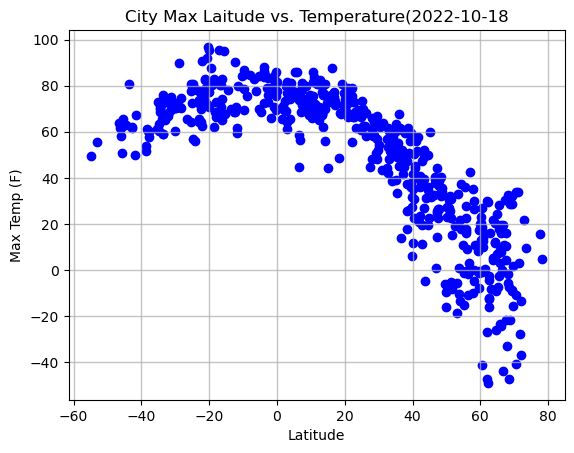

In [11]:
#x_values=pd.to_numeric(city_data["Latitude"]).astype(float)
#y_values=pd.to_numeric(city_data["Max Temp"]).astype(float)

# Incorporate the other graph properties
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor="blue")
plt.title("City Max Laitude vs. Temperature(2022-10-18")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.75)
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

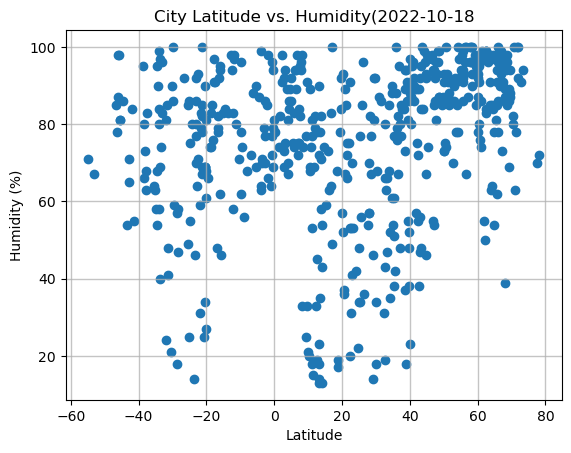

In [12]:
# Build scatter plot for latitude vs. temperature
x_values=pd.to_numeric(weather_df["Lat"]).astype(float)
y_values=pd.to_numeric(weather_df["Humidity"]).astype(float)

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.title("City Latitude vs. Humidity(2022-10-18")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.75)
# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

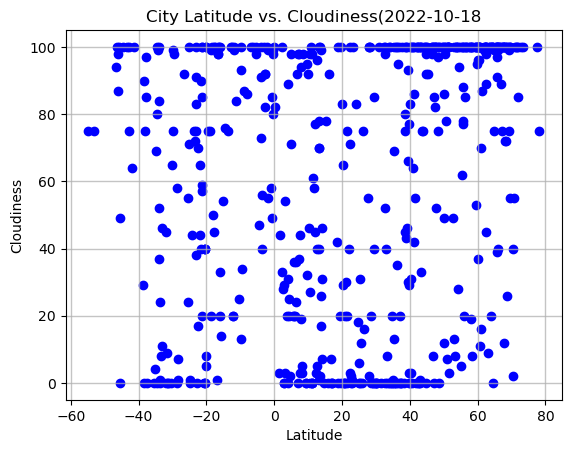

In [13]:
# Build scatter plot for latitude vs. temperature
x_values=pd.to_numeric(weather_df["Lat"]).astype(float)
y_values=pd.to_numeric(weather_df["Cloudiness"]).astype(float)

# Incorporate the other graph properties
plt.scatter(x_values, y_values, facecolor = "blue")
plt.title("City Latitude vs. Cloudiness(2022-10-18")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(linestyle='-', linewidth=1, alpha = 0.75)
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

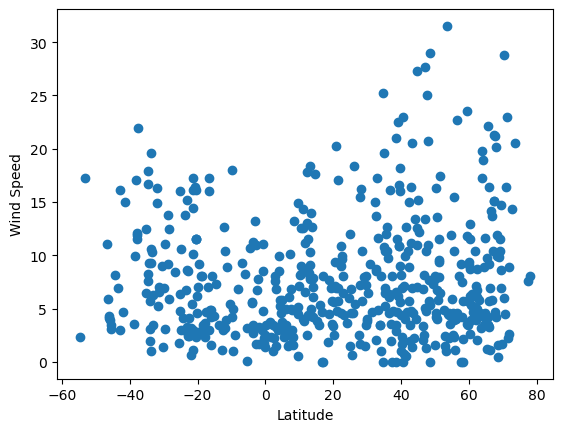

In [14]:
# Build scatter plot for latitude vs. temperature
x_values=pd.to_numeric(weather_df["Lat"]).astype(float)
y_values=pd.to_numeric(weather_df["Wind Speed"]).astype(float)

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def lin_regress(x_values, y_values, coor):
    (slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
    regress= x_values*slope+intercept
    line_equ="y="+str(round(slope,2)) + "x+"+str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress, "r-")
    plt.annotate(line_equ,coor,fontsize=12,color="red")
    print(f'Regression line equation is : {line_equ}')  
    
#def annotate(line_equ, x_values, y_values):
    #plt.annotate()


In [16]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = weather_df.loc[weather_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,qaanaaq,77.4840,-69.3632,15.42,70,100,7.56,GL,1671160075
2,hilo,19.7297,-155.0900,76.73,84,100,5.75,US,1671160058
3,butaritari,3.0707,172.7902,81.52,75,54,6.80,KI,1671160076
4,belle fourche,44.6714,-103.8522,19.51,67,100,27.29,US,1671160076
10,mayo,38.8876,-76.5119,50.95,94,100,11.50,US,1671160078


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = weather_df.loc[weather_df["Lat"] <= 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castro,-24.7911,-50.0119,56.77,75,1,2.98,BR,1671160075
5,arraial do cabo,-22.9661,-42.0278,72.70,80,38,15.21,BR,1671160076
6,busselton,-33.6500,115.3333,76.14,40,0,9.28,AU,1671160077
7,prieska,-29.6641,22.7474,72.59,59,98,11.10,ZA,1671160077
8,geraldton,-28.7667,114.6000,90.01,18,0,13.80,AU,1671160077


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is : y=-1.33x+89.93


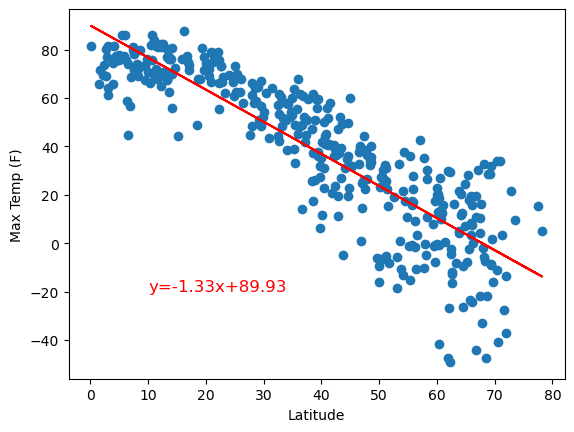

In [19]:
# Linear regression on Northern Hemisphere
plot = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (10,-20))
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.show()


Regression line equation is : y=0.43x+82.03


Text(0.5, 0, 'Latitude')

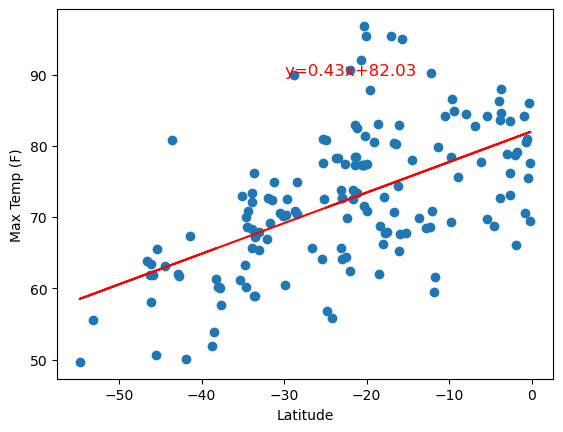

In [20]:
plot = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (-30,90))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")


**Discussion about the linear relationship:The Northern Hemisphere has a negative slope, whereas the Southern Hemisphere has a positive slope.

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is : y=0.42x+59.94


Text(0, 0.5, 'Humidity')

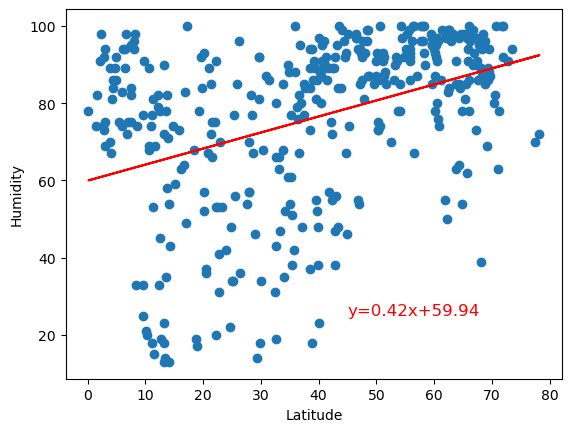

In [21]:
plot = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],(45,25))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

Regression line equation is : y=0.15x+76.67


Text(0, 0.5, 'Humidity')

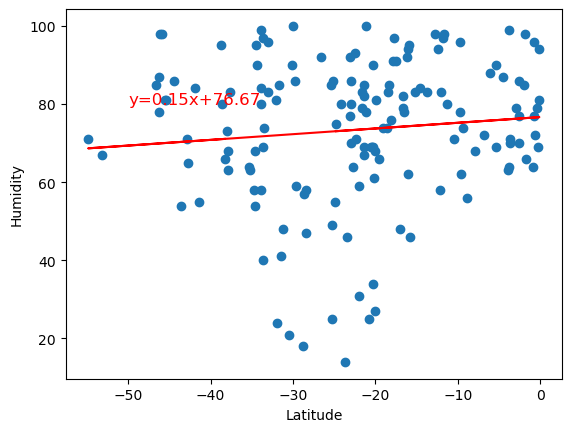

In [22]:
plot = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-50, 80))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

**Discussion about the linear relationship: Both Northern and Southern Hemisphere have a positive slope.

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is : y=0.87x+25.26


Text(0, 0.5, 'Cloudiness')

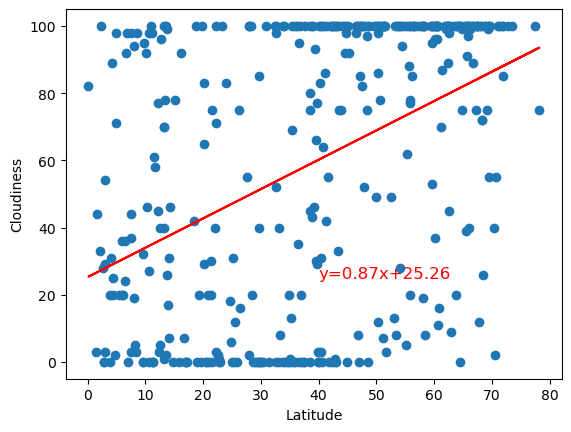

In [23]:
# Northern Hemisphere
plot = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (40,25))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

Regression line equation is : y=0.53x+73.05


Text(0, 0.5, 'Cloudiness')

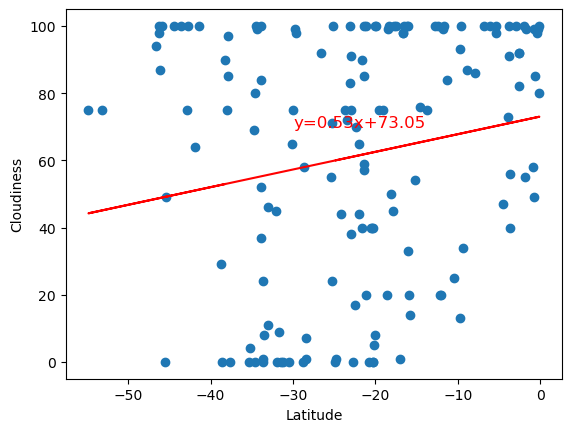

In [24]:

# Southern Hemisphere
plot = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (-30,70))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

**Discussion about the linear relationship: Both Northern and Southern Hemisphere share a positive slope.

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is : y=0.04x+6.11


Text(0, 0.5, 'Wind Speed')

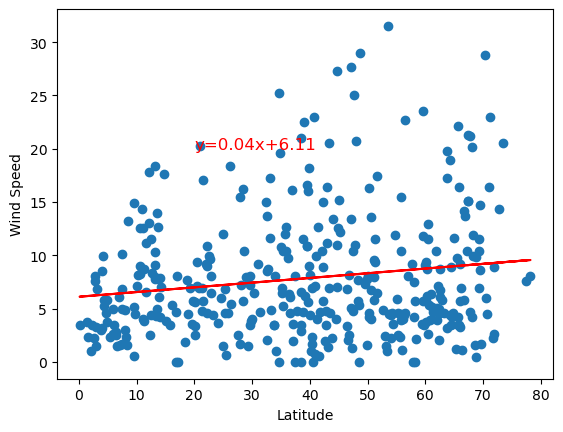

In [25]:
# Northern Hemisphere
plot = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (20,20))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

Regression line equation is : y=-0.09x+5.44


Text(0, 0.5, 'Wind Speed')

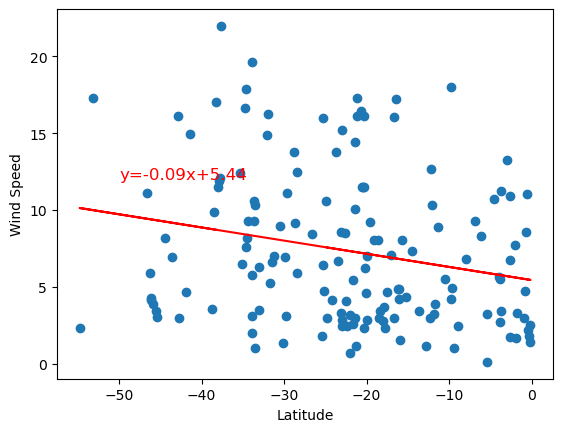

In [26]:
# Southern Hemisphere
plot = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-50,12))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

**Discussion about the linear relationship: There is a slight positive slope in the Northern Hemisphere, and a negative slope in the Southern Hemisphere. 